In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.9 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# 1. まず画像をネットから持ってくる（この行が重要！）
!curl -o input.jpg https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/assets/bus.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  134k  100  134k    0     0   672k      0 --:--:-- --:--:-- --:--:--  674k



image 1/1 /content/input.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 381.5ms
Speed: 15.3ms preprocess, 381.5ms inference, 47.9ms postprocess per image at shape (1, 3, 640, 480)


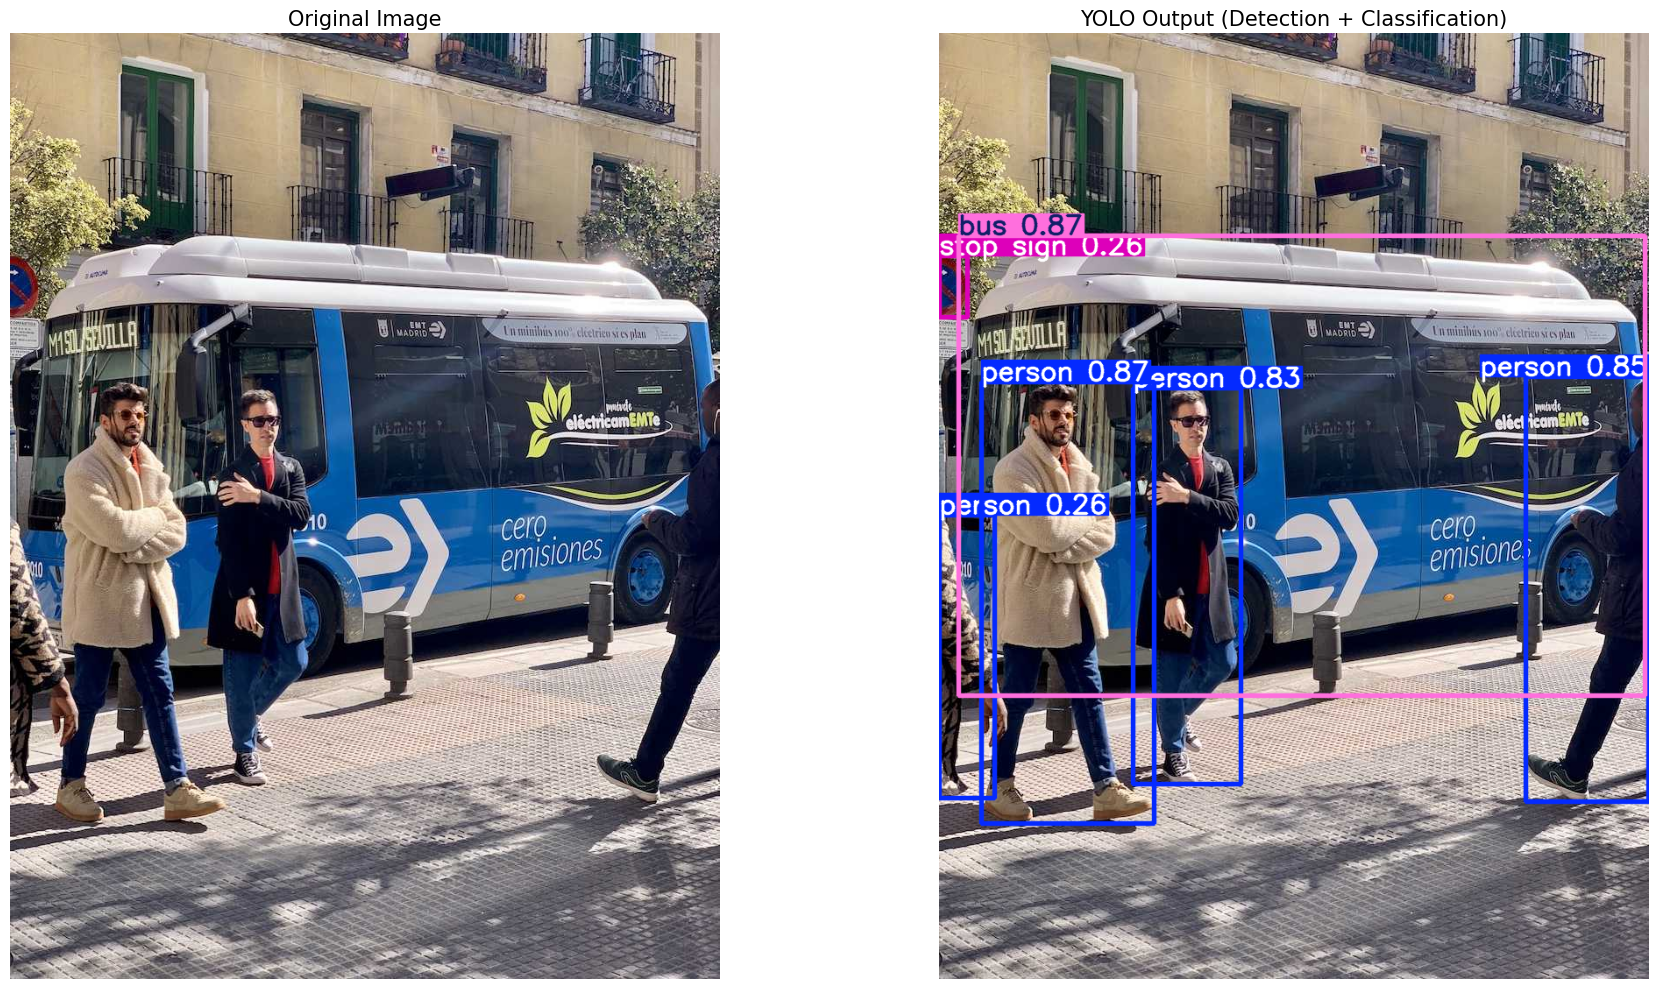

In [ ]:

# 1. 画像の読み込み（元画像）
img_orig = cv2.imread('input.jpg')
img_orig_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

# 2. YOLOで推論
model = YOLO('yolov8n.pt')
results = model('input.jpg')

# 3. 処理後画像の作成（枠とラベル付き）
annotated_frame = results[0].plot()
annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# 4. 2つの画像を並べて表示
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# 左側：元画像
axes[0].imshow(img_orig_rgb)
axes[0].set_title('Original Image', fontsize=15)
axes[0].axis('off')

# 右側：推論結果（マルチタスク学習の成果）
axes[1].imshow(annotated_frame_rgb)
axes[1].set_title('YOLO Output (Detection + Classification)', fontsize=15)
axes[1].axis('off')

plt.tight_layout()
plt.show()